# "How I Met Your Mother" script EDA project

In this project, I will attempt to anwer a number of questions using the "How I Met Your Mother" TV show script as my dataset.

1. At some point around episode 140, the script looks different. It appears the split to lines is a lot worse, meaning:

- Looking at the raw data you can see that for **EpisodeId < 140** lines look like this:  
  <em>"Speaker: lines"<em>  

    
- Where as for **EpisodeId >= 140** we dont have a speaker and lines are split to a few different lines with no apperant logic:   
    <em>"Part of line"<em>  
    <em>"Another part of line"<em>  
    <em>"Another part of line"<em>
    
Let's look at the sentences distribution throughout the show.


First, importing relevant packages and the CSV file where data is stored.

In [2]:
import csv
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.min_rows', 1000)
pd.set_option('display.max_rows', 2000)
#pd.reset_option("all")
pd.set_option('display.max_colwidth', None)

In [3]:
data= pd.read_csv('C:\\Users\\mayas\\Desktop\\naya\\final excercise statistics python amit rappel\\HowIMetYourMotherScript.txt')

In [5]:
data.set_index('SentenceId', inplace=True)
data.dropna(inplace=True)

df1 = data.loc[data['EpisodeId']<140]
df2 = data.loc[data['EpisodeId']>=140]#Seperating into 2 datasets dor comparison

Cleaning lines of EpisodeId < 140:

In [6]:
#data1 will only include episodeid in [52,40,64,56] because it's different then other episodes with episodeid<140.
data1 = pd.DataFrame()
diff_episodes = [52,40,64,56]

data1 =df1[df1['EpisodeId'].isin([52,40,64,56])]

#Removing lines with songs
data1 = data1.loc[~data1['Sentence'].str.contains('♪')]
data1.dropna(inplace=True)

#data2 will be: data[data.episodeid <140] - data1.
data2 = df1.copy()
data2 = data2[~data2.EpisodeId.isin([52,40,64,56])]

#only using lines with speaker: lines
data2 = data2.loc[data2['Sentence'].str.contains(':')]
data2.dropna(inplace=True)

#removing lines that contain music.
data2 = data2.loc[~data2['Sentence'].str.contains('♪')]
data2.dropna(inplace=True)

#removing lines that contain all Parenthesys ():
data2 = data2.loc[~data2['Sentence'].str.fullmatch('\(.*\)')]
data2.dropna(inplace=True)

smaller_140_data = pd.concat([data1, data2])
smaller_140_data = smaller_140_data.sort_index()

smaller_140_data = smaller_140_data.loc[~smaller_140_data.Sentence.str.fullmatch('\[.*\]')]
smaller_140_data.dropna(inplace=True)

Cleaning lines of episodeid >= 140:

In [7]:

#Removing lines that contain music.
df2 = df2.loc[~df2['Sentence'].str.contains('♪')]
df2.dropna(inplace=True)

#Removing lines that contain all Parenthesys ():
df2 = df2.loc[~df2['Sentence'].str.fullmatch('\(.*\)')]
df2.dropna(inplace=True)

#Removing comment lines
df2 = df2.loc[~df2['Sentence'].str.contains('Original Air Date on')]
df2.dropna(inplace=True)

<AxesSubplot:ylabel='Frequency'>

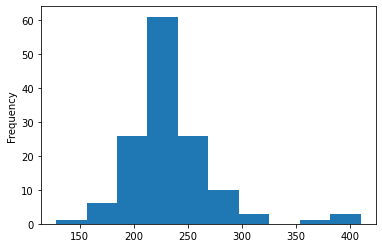

In [9]:
a = smaller_140_data.groupby('EpisodeId')['Sentence'].count()
a.plot.hist() #A histogram of number of sentences per episode for EpisodeId < 140

<AxesSubplot:ylabel='Frequency'>

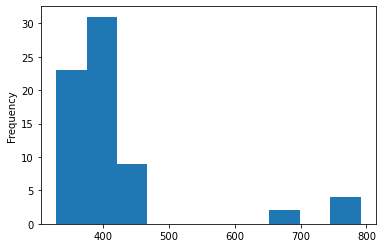

In [10]:
b = df2.groupby('EpisodeId')['Sentence'].count()
b.plot.hist() ##A histogram of number of sentences per episodes for EpisodeId >= 140

Text(0, 0.5, 'Sentence Count')

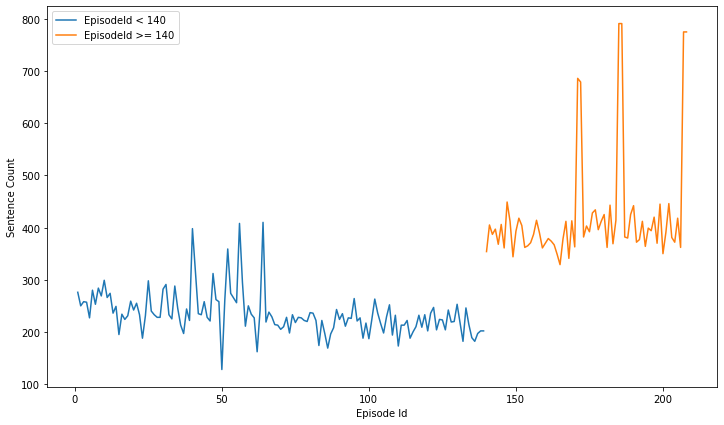

In [11]:
a.plot(figsize=(12,7))
b.plot(figsize=(12,7))
plt.legend(["EpisodeId < 140", "EpisodeId >= 140"])
plt.xlabel("Episode Id")
plt.ylabel("Sentence Count") #A graph of every episode's sentence count

**Conclusion**  
This is a graph of every episode's sentence count (The whole show- a total of 208 episodes over 9 seasons).  
You can clearly see the number of Sentences per episode for **EpisodeId >= 140** is bigger then that of **EpisodeId < 140.**

Also, as said previously, in episodes where **EpisodeId >= 140** there is no indication of who the speaker is and every single line is split into seperate lines for no reason.

In [12]:
a.median(), a.mean() #Mean and median sentence count per episode (EpisodeId < 140)

(228.0, 233.82481751824818)

In [13]:
b.median(), b.mean() #Mean and median sentence count per episode (EpisodeId >= 140)

(392.0, 421.4782608695652)

# Most Mentioned Characters
- Who is the most mentioned character by name?  
- And what can we learn from the number of mentions the characters individually make of each other?

<div class="alert alert-block alert-warning">
<b>Important info:</b> <br>
                   For the purposes of this analysis, I will only use the data that is transcribed as "speaker: line".<br>  
                   My conclusions upply only to these episodes.<br>
                   To further analyse the data more advanced data science tools will be required.<br>  
                   (EpisodeId < 140 ,EpisodeId != 52,40,64,56 ) </div>

In [2]:
d1 = smaller_140_data[~smaller_140_data.EpisodeId.isin([52,40,64,56])] #Removing lines that are not transcribed proparly

d1['Speaker'] = d1['Sentence'].str.split(':' ,1).str[0]
d1['line'] = d1['Sentence'].str.split(':' ,1).str[1]
d1.drop('Sentence', inplace=True, axis=1) #Dividing Sentence col into Speaker and Line for easier analysis

d1['Speaker'].replace('\(.*\)', '', inplace=True, regex=True)
d1['Speaker'].replace('\[.*\]', '', inplace=True, regex=True)
d1['line'].replace('\(.*\)', '', inplace=True, regex=True) #Cleaning actions "(marshell drinks)" etc.

In [15]:
nicknames = [['Ted', 'Teddy Westside', 'T-Mose', 'Teddy Bear', 'Galactic President Superstar McAwesomeville'], 
            ['Marshall', 'Marsh ', 'Marshmallow', 'Big Fudge', 'Vanilla Thunder', 'Marsh Madness'], 
            ['Barney', 'The Barnacle'], 
            ['Robin', 'Robin Sparkles', 'RJ', 'Roland'], 
            ['Lily', 'Lilypad', 'Lori']] #Listing nicknames for each character.

In [16]:
excep_list_b4 = ["'s mother" , "'s father", "'s dad" ,
              "'s wife", "'s daughter", "'s son",
              "'s brother", "'s mom", "'s date",
              "'s Dumped Friend", "'s grandma"] #Listing speakers that contain the character name but are not him.
              
excep_list_after = ["Children of " , 'Lily, fighting ', 
                  "Waitress at the old " , "'s Secretary",
                  "Lily, holding ", "Ted, whispering to ",
                  "Ted, on the phone with ", "Father of ",
                  "Marshall, lifting the shirt of "] #Same.

In [17]:

main_characters = [x[0] for x in nicknames] #A list of main characters for later iteration.
result_dict = dict() #Will be dict of DataFrames of lines for each speaker.
s_dict = dict() #Will be dict of series with speaker names, nicknames included.

char_mentions = dict()
for y in range(5):
    char_mentions.update({nicknames[y][0] : {}})#Creating a dictionary to contain all final character mentions



for character in main_characters: #Iterating over every character name, getting 'speaker' series.
    s_dict[character] = d1['Speaker'].loc[d1.Speaker.str.contains(character, flags=re.IGNORECASE)]
    for person in excep_list_b4: #Dropping junk speaker names.
        s_dict[character].drop(labels = s_dict[character].loc[s_dict[character].str.contains(f'{character}{person}', flags=re.IGNORECASE, regex=False)].index, inplace=True)
    for person in excep_list_after:
        s_dict[character].drop(labels = s_dict[character].loc[s_dict[character].str.contains(f'{person}{character}', flags=re.IGNORECASE, regex=False)].index, inplace=True)
        
    result_dict[character] = d1.merge(s_dict[character],how= 'right', on='SentenceId', suffixes=(None,'y'))
    result_dict[character].drop('Speakery', axis=1, inplace=True) #Merging with DF that has lines to get lines of every speaker.    
    
    for character_nicknames in nicknames: 
        mentions_counter = 0 
        for nickname in character_nicknames: 
            mentions = result_dict[character]['line'].str.count(nickname).sum() 
            mentions_counter += mentions 
        char_mentions[character].update({character_nicknames[0]: mentions_counter}) #Iterating over every character DF,
                                                                                    #to get dict with number of mentions
                                                                                    #of every other character.
        

In [1]:
char_mentions #This is the dict we got.

In [19]:
c = []
l = []
for character in main_characters:
    c.append(character)
    l.append(result_dict[character].line.count())

dl = {'Characters': c, 'Total spoken lines': l}
dfl = pd.DataFrame(data=dl).sort_values(by = 'Total spoken lines', ascending=False)
dfl #Quickly showing the total number of lines per character to get an idea of how many lines each person has.

,Characters,Total spoken lines
0,Ted,7522
2,Barney,5099
1,Marshall,4612
3,Robin,4053
4,Lily,3875


In this table, we can see that Ted has the most lines.  
Makes sense since he is the main character so he talkes the most, and is the most dominent throughout the part of the script analysed.

In [20]:
char_mentions_df = pd.DataFrame.from_dict(char_mentions)

Text(0.5, 1.0, 'Character Mentions')

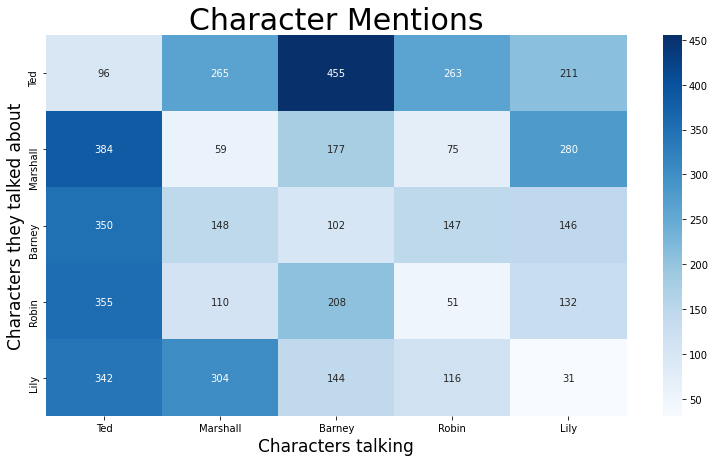

In [21]:
plt.figure(figsize = (13,7))

s = sns.heatmap(char_mentions_df, annot=True, fmt='d', cmap='Blues')
s.set(xlabel='Characters talking', ylabel='Characters they talked about')
plt.xlabel('Characters talking', size = 17) 
plt.ylabel('Characters they talked about', size = 17)
plt.title('Character Mentions', size = 30)

**Interesting Insights**
- Marshell and Lily mention each other the most, even more then ted (which has the highest amount of mentions). 
In this period of the show examined (from pilot untill season 7 episode 3) they are dating and got married on the end of the season.  This Heatmap may indicate that relashionship.


- Characters mention their own name the least. The character that mentions his own name the most is Barney. This may be due to the way he  introduces himself: *\"Hi, my name is Barney Stinson\"* , *\"I'm Barney\"* etc. Further analysis is required to determine that.


- Both Robin and Barney mention Ted the most. As the lead character it makes sense.


- Ted mentions Marshell the most during the show. They both mention several times during the show they are best friends (season 2 episode 3 "Brunch", season 1 episode 8 "The Duel" and more..


# Total Character Mentions in Series

In [23]:
s1 = char_mentions_df.sum(axis = 0).sort_values(ascending=False) #Total mentions (not divided by who mentioned who) 

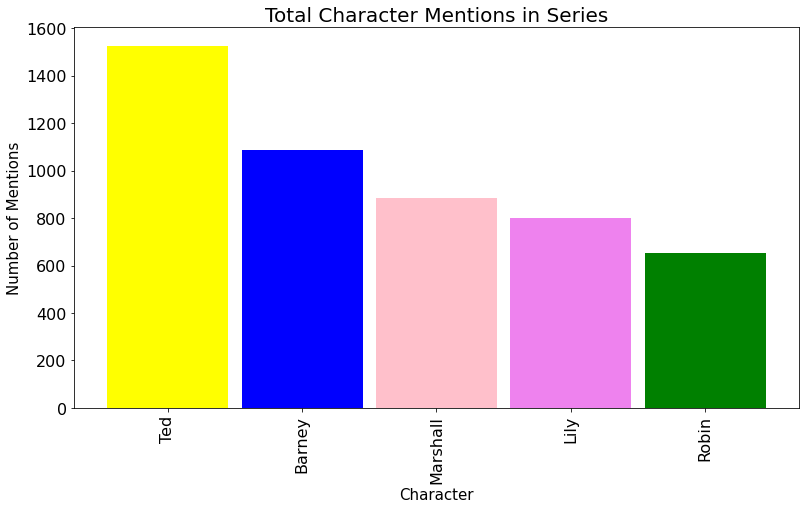

In [24]:
co = ['yellow', 'blue' , 'pink' , 'violet' , 'green']
s1.plot.bar(figsize=(13,7), color = co, width= 0.9)

plt.xlabel('Character', size = 15) 
plt.xticks(fontsize = 16)
plt.ylabel('Number of Mentions', size = 15)
plt.yticks(fontsize = 16) 
plt.title('Total Character Mentions in Series', size = 20)
plt.show() #Creating a graph with number of mentions throughout period of the script analysed.


We can clearly see here that Ted is mentioned the most compared to all other characters. Makes sense, since he is the main character in the show.  
As already proven, he has the biggest number of lines out of all the other characters (for the episodes examined) - so it makes perfect sense that he is the most dominent and therefore most mentioned character in the show.